# Лабораторная работа 5
# Выполнил Угарин Никита Александрович

## Задание 2: Анализ тональности текста

Цели задания
1. Загрузить и предобработать текстовые данные
2. Создать и обучить модель SimpleRNN для классификации тональности
3. Создать и обучить модель LSTM для классификации тональности
4. Создать и обучить модель Bidirectional LSTM для классификации тональности
5. Сравнить производительность трех моделей и сделать выводы

### 1. Загрузка и предобработка данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, Bidirectional
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
import seaborn as sns

Параметры

In [2]:
max_features = 10000 # Размер словаря (количество наиболее частых слов)
maxlen = 500 # Максимальная длина последовательности
embedding_dims = 128 # Размерность векторного представления слов

Загрузка данных

In [3]:
print('Загрузка данных...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(f'Загружено {len(x_train)} обучающих последовательностей')
print(f'Загружено {len(x_test)} тестовых последовательностей')

Загрузка данных...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Загружено 25000 обучающих последовательностей
Загружено 25000 тестовых последовательностей


Приведение последовательностей к одинаковой длине


In [4]:
print('Приведение последовательностей к одинаковой длине...')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print(f'Форма обучающих данных: {x_train.shape}')
print(f'Форма тестовых данных: {x_test.shape}')


Приведение последовательностей к одинаковой длине...
Форма обучающих данных: (25000, 500)
Форма тестовых данных: (25000, 500)


Функция для оценки модели

In [5]:
def evaluate_model(model, x_test, y_test):
    y_pred = (model.predict(x_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Точность (Accuracy): {accuracy:.4f}')
    print(f'Точность (Precision): {precision:.4f}')
    print(f'Полнота (Recall): {recall:.4f}')
    print(f'F1-мера: {f1:.4f}')
    
    # Построение матрицы ошибок
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Матрица ошибок')
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')
    plt.show()
    return accuracy, precision, recall, f1

### 2. Создание и обучение модели SimpleRNN

Создание модели SimpleRNN

In [6]:
def create_simple_rnn_model():
    model = Sequential()
    model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
    model.add(SimpleRNN(units=64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model


Обучение модели SimpleRNN

In [7]:
print('Обучение модели SimpleRNN...')
simple_rnn_model = create_simple_rnn_model()
simple_rnn_history = simple_rnn_model.fit(x_train, y_train,
                                            batch_size=32,
                                            epochs=10,
                                            validation_data=(x_test, y_test),
                                            verbose=2)


Обучение модели SimpleRNN...
Epoch 1/10


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


782/782 - 79s - 101ms/step - accuracy: 0.5294 - loss: 0.6945 - val_accuracy: 0.5630 - val_loss: 0.6779
Epoch 2/10
782/782 - 78s - 100ms/step - accuracy: 0.5657 - loss: 0.6763 - val_accuracy: 0.5787 - val_loss: 0.6709
Epoch 3/10
782/782 - 86s - 110ms/step - accuracy: 0.5906 - loss: 0.6619 - val_accuracy: 0.5813 - val_loss: 0.6638
Epoch 4/10
782/782 - 86s - 110ms/step - accuracy: 0.6208 - loss: 0.6408 - val_accuracy: 0.5898 - val_loss: 0.6535
Epoch 5/10
782/782 - 85s - 108ms/step - accuracy: 0.6366 - loss: 0.6234 - val_accuracy: 0.6136 - val_loss: 0.6407
Epoch 6/10
782/782 - 85s - 108ms/step - accuracy: 0.6590 - loss: 0.6022 - val_accuracy: 0.6108 - val_loss: 0.6369
Epoch 7/10
782/782 - 86s - 110ms/step - accuracy: 0.6787 - loss: 0.5851 - val_accuracy: 0.6188 - val_loss: 0.6376
Epoch 8/10
782/782 - 85s - 109ms/step - accuracy: 0.6845 - loss: 0.5685 - val_accuracy: 0.6236 - val_loss: 0.6353
Epoch 9/10
782/782 - 84s - 108ms/step - accuracy: 0.7003 - loss: 0.5552 - val_accuracy: 0.6171 - va

Оценка модели SimpleRNN


Оценка модели SimpleRNN:
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step
Точность (Accuracy): 0.6076
Точность (Precision): 0.5987
Полнота (Recall): 0.6529
F1-мера: 0.6246


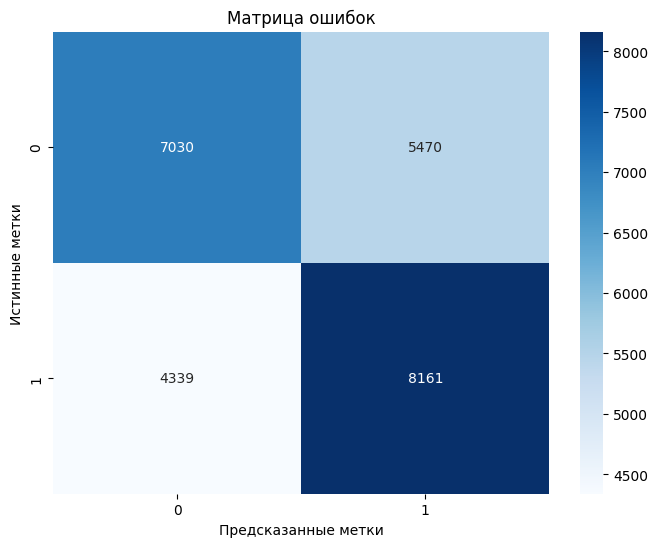

In [8]:
print('\nОценка модели SimpleRNN:')
simple_rnn_metrics = evaluate_model(simple_rnn_model, x_test, y_test)

### 3. Создание и обучение модели LSTM

Cоздание модели LSTM


In [9]:
def create_lstm_model():
    model = Sequential()
    model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
    model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

Обучение модели LSTM

In [10]:
print('Обучение модели LSTM...')
lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(x_train, y_train,
                                batch_size=32,
                                epochs=10,
                                validation_data=(x_test, y_test),
                                verbose=2)


Обучение модели LSTM...
Epoch 1/10


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


782/782 - 307s - 393ms/step - accuracy: 0.7768 - loss: 0.4762 - val_accuracy: 0.8494 - val_loss: 0.3637
Epoch 2/10
782/782 - 310s - 397ms/step - accuracy: 0.8341 - loss: 0.3793 - val_accuracy: 0.8552 - val_loss: 0.3527
Epoch 3/10
782/782 - 330s - 423ms/step - accuracy: 0.8575 - loss: 0.3375 - val_accuracy: 0.8273 - val_loss: 0.3884
Epoch 4/10
782/782 - 321s - 410ms/step - accuracy: 0.9128 - loss: 0.2224 - val_accuracy: 0.8786 - val_loss: 0.3063
Epoch 5/10
782/782 - 300s - 383ms/step - accuracy: 0.9442 - loss: 0.1509 - val_accuracy: 0.8796 - val_loss: 0.3332
Epoch 6/10
782/782 - 299s - 382ms/step - accuracy: 0.9636 - loss: 0.1039 - val_accuracy: 0.8750 - val_loss: 0.3655
Epoch 7/10
782/782 - 300s - 384ms/step - accuracy: 0.9740 - loss: 0.0749 - val_accuracy: 0.8621 - val_loss: 0.4454
Epoch 8/10
782/782 - 300s - 384ms/step - accuracy: 0.9831 - loss: 0.0521 - val_accuracy: 0.8684 - val_loss: 0.4881
Epoch 9/10
782/782 - 300s - 384ms/step - accuracy: 0.9890 - loss: 0.0364 - val_accuracy: 0.

Оценка модели LSTM



Оценка модели LSTM:
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step
Точность (Accuracy): 0.8658
Точность (Precision): 0.8763
Полнота (Recall): 0.8518
F1-мера: 0.8639


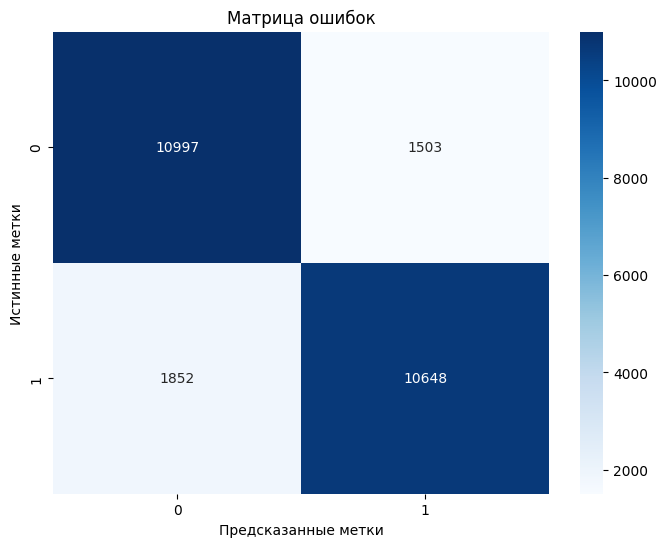

In [12]:
print('\nОценка модели LSTM:')
lstm_metrics = evaluate_model(lstm_model, x_test, y_test)


### 4. Создание и обучение модели Bidirectional LSTM

Создание модели Bidirectional LSTM

In [13]:
def create_bidirectional_lstm_model():
    model = Sequential()
    model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
    model.add(Bidirectional(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model


Обучение модели Bidirectional LSTM

In [14]:
print('Обучение модели Bidirectional LSTM...')
bidirectional_lstm_model = create_bidirectional_lstm_model()
bidirectional_lstm_history = bidirectional_lstm_model.fit(x_train, y_train,
                                                            batch_size=32,
                                                            epochs=10,
                                                            validation_data=(x_test, y_test),
                                                            verbose=2)


Обучение модели Bidirectional LSTM...
Epoch 1/10


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


782/782 - 1090s - 1s/step - accuracy: 0.7662 - loss: 0.4844 - val_accuracy: 0.8038 - val_loss: 0.4370
Epoch 2/10
782/782 - 1154s - 1s/step - accuracy: 0.8521 - loss: 0.3542 - val_accuracy: 0.8344 - val_loss: 0.3843
Epoch 3/10
782/782 - 1189s - 2s/step - accuracy: 0.8882 - loss: 0.2848 - val_accuracy: 0.8646 - val_loss: 0.3429
Epoch 4/10
782/782 - 1247s - 2s/step - accuracy: 0.9116 - loss: 0.2266 - val_accuracy: 0.8678 - val_loss: 0.3472
Epoch 5/10
782/782 - 1083s - 1s/step - accuracy: 0.9036 - loss: 0.2429 - val_accuracy: 0.8447 - val_loss: 0.3987
Epoch 6/10
782/782 - 1258s - 2s/step - accuracy: 0.9319 - loss: 0.1804 - val_accuracy: 0.8614 - val_loss: 0.4046
Epoch 7/10
782/782 - 1207s - 2s/step - accuracy: 0.9525 - loss: 0.1309 - val_accuracy: 0.8643 - val_loss: 0.3982
Epoch 8/10
782/782 - 1156s - 1s/step - accuracy: 0.9624 - loss: 0.1030 - val_accuracy: 0.8579 - val_loss: 0.4656
Epoch 9/10
782/782 - 1229s - 2s/step - accuracy: 0.9740 - loss: 0.0774 - val_accuracy: 0.8334 - val_loss: 0

Оценка модели Bidirectional LSTM



Оценка модели Bidirectional LSTM:
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step
Точность (Accuracy): 0.8455
Точность (Precision): 0.8800
Полнота (Recall): 0.8001
F1-мера: 0.8381


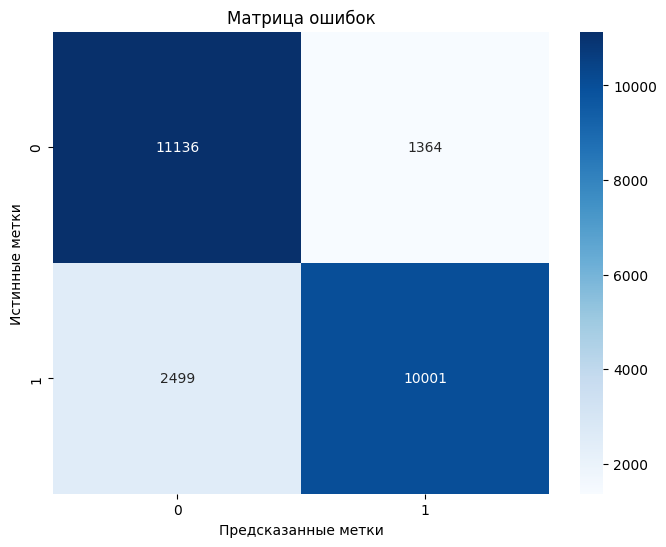

In [15]:
print('\nОценка модели Bidirectional LSTM:')
bidirectional_lstm_metrics = evaluate_model(bidirectional_lstm_model, x_test, y_test)


### 5. Визуализация результатов обучения

Визуализация точности на обучающей и проверочной выборках

In [20]:
def plot_history(histories, names):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)

    # график точности
    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'], label=f'{names[i]} (обучение)')
        plt.plot(history.history['val_accuracy'], label=f'{names[i]} (проверка)')
    plt.title('Точность моделей')
    plt.xlabel('Эпоха')
    plt.ylabel('Точность')
    plt.legend()

    # График функции потерь
    plt.subplot(1, 2, 2)
    for i, history in enumerate(histories):
        plt.plot(history.history['loss'], label=f'{names[i]} (обучение)')
        plt.plot(history.history['val_loss'], label=f'{names[i]} (проверка)')
    plt.title('Функция потерь')
    plt.xlabel('Эпоха')
    plt.ylabel('Потери')
    plt.legend()
    plt.tight_layout()
    plt.show()



Визуализация результатов обучения

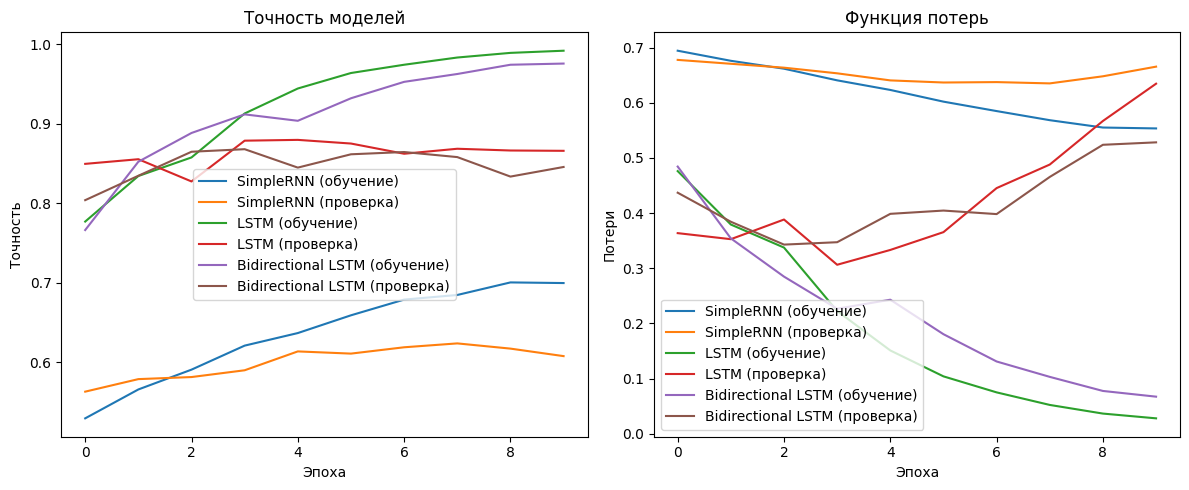

In [21]:
histories = [simple_rnn_history, lstm_history, bidirectional_lstm_history]
names = ['SimpleRNN', 'LSTM', 'Bidirectional LSTM']
plot_history(histories, names)

Сравнение метрик моделей

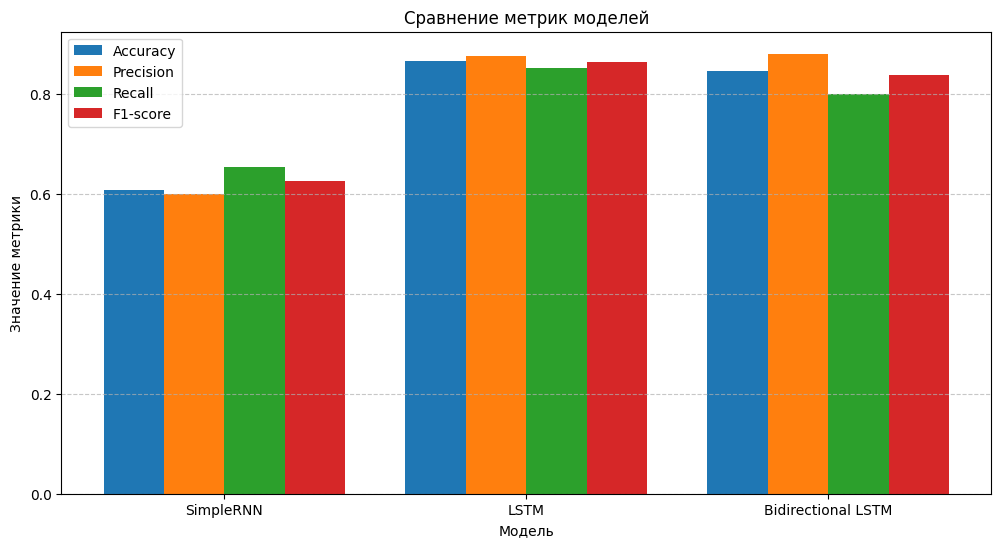

In [23]:
metrics = [simple_rnn_metrics, lstm_metrics, bidirectional_lstm_metrics]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
plt.figure(figsize=(12, 6))
x = np.arange(len(names))
width = 0.2
for i, metric_name in enumerate(metrics_names):
    values = [metric[i] for metric in metrics]
    plt.bar(x + (i - 1.5) * width, values, width, label=metric_name)
plt.xlabel('Модель')
plt.ylabel('Значение метрики')
plt.title('Сравнение метрик моделей')
plt.xticks(x, names)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 6. Анализ результатов и выводы

In [24]:
def analyze_misclassifications(model, x_test, y_test, num_examples=5):
    # Получение предсказаний
    y_pred = (model.predict(x_test) > 0.5).astype("int32")
    # Нахождение неправильно классифицированных примеров
    misclassified_indices = np.where(y_pred.flatten() != y_test)[0]
    # Загрузка словаря для преобразования индексов в слова
    word_index = imdb.get_word_index()
    reverse_word_index = {value: key for key, value in word_index.items()}
    # Функция для преобразования последовательности индексов в текст
    def sequence_to_text(sequence):
        return ' '.join([reverse_word_index.get(i - 3, '?') for i in sequence if i > 3])
    # Вывод неправильно классифицированных примеров
    print(f"Примеры неправильно классифицированных отзывов ({model.name}):")
    for i in range(min(num_examples, len(misclassified_indices))):
        idx = misclassified_indices[i]
        text = sequence_to_text(x_test[idx])
        true_sentiment = "положительный" if y_test[idx] == 1 else "отрицательный"
        pred_sentiment = "положительный" if y_pred[idx] == 1 else "отрицательный"
        print(f"\nПример {i+1}:")
        print(f"Текст: {text[:200]}...")
        print(f"Истинная тональность: {true_sentiment}")
        print(f"Предсказанная тональность: {pred_sentiment}")


Анализ неправильно классифицированных примеров для каждой модели


In [25]:
simple_rnn_model.name = "SimpleRNN"
lstm_model.name = "LSTM"
bidirectional_lstm_model.name = "Bidirectional LSTM"
analyze_misclassifications(simple_rnn_model, x_test, y_test)
analyze_misclassifications(lstm_model, x_test, y_test)
analyze_misclassifications(bidirectional_lstm_model, x_test, y_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Примеры неправильно классифицированных отзывов (SimpleRNN):

Пример 1:
Текст: at a time when motion picture animation of all sorts was in its br br the political of the russian revolution caused to move to paris where one of his first productions was a dark political satire kno...
Истинная тональность: положительный
Предсказанная тональность: отрицательный

Пример 2:
Текст: i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just complain about it this was absolutely idiotic the things that happen w...
Истинная тональность: отрицательный
Предсказанная тональность: положительный

Пример 3:
Текст: later used by frank in mr deeds goes to town and meet john but in no one individual is cast as a hero or heroine the story is told through a series of scenes that are combined in a special effect know...
Истинная тональность: положи